In [716]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
import time
import matplotlib.dates as mdates
from scipy.optimize import basinhopping
%matplotlib inline

In [832]:
id = 7193

In [739]:
sales = pd.read_csv("sales_history.csv", sep=',')
sales = sales[(sales['sale_dt']>'2019-01-01') & (sales['sale_dt']<'2020-01-01')]
sales.head()

,Unnamed: 0,salerevenuerub,soldpieces,skutertiaryid,posid,sale_dt
3433244,4300374,89.205,1,7182,293136,2019-01-21
3433245,4300375,89.205,1,7182,293136,2019-01-28
3433246,4300376,267.615,3,7182,293136,2019-01-14
3433247,4300377,400.425,5,7182,293136,2019-01-07
3433249,4300379,89.205,1,7182,296672,2019-01-28


In [740]:
#sales = sales[sales['skutertiaryid']==id]

sales["sale_dt"] = pd.to_datetime(sales["sale_dt"])
summ = sales.groupby(by=['sale_dt', 'skutertiaryid'], as_index=False)['salerevenuerub'].sum()
pcs = sales.groupby(by=['sale_dt', 'skutertiaryid'], as_index=False)['soldpieces'].sum()


summ_pcs = pd.merge(summ, pcs, how="left", left_index=True, right_index=True)

summ_pcs = summ_pcs[['sale_dt_x','skutertiaryid_x','salerevenuerub', 'soldpieces']]




In [741]:
day_of_week = pd.merge(summ['sale_dt'], summ['sale_dt'].apply(lambda x: x.strftime("%A")), how='left', left_index=True, right_index=True)
summ_pcs['day_of_week']=''
for i in range(len(summ_pcs)):
    for j in range(len(day_of_week)):
        if summ_pcs.iloc[i,0]==day_of_week.iloc[j,0]:
            summ_pcs.iloc[i,4]=day_of_week.iloc[j,1]
            break
total_sales = summ_pcs[['sale_dt_x','day_of_week','skutertiaryid_x','salerevenuerub', 'soldpieces']]
total_sales = total_sales.rename(columns={'skutertiaryid_x': 'skutertiaryid'})
total_sales = total_sales.rename(columns={'sale_dt_x': 'sale_dt'})
total_sales[total_sales['skutertiaryid']==7248]

,sale_dt,day_of_week,skutertiaryid,salerevenuerub,soldpieces


In [742]:
for i in range(len(total_sales)):
    if total_sales.iloc[i, 1]!='Monday':
        total_sales.iloc[i, 2]
        total_sales.iloc[i-10,3]=total_sales.iloc[i-10,3]+total_sales.iloc[i,3]
        total_sales.iloc[i-10,4]=total_sales.iloc[i-10,4]+total_sales.iloc[i,4]
        total_sales.iloc[i,1]='NAN'

        
total_sales = total_sales.loc[total_sales['day_of_week'] != 'NAN']
total_sales = total_sales.drop(['day_of_week'], axis=1)



In [743]:
dff = total_sales[total_sales['sale_dt']=='2019-05-27']
for i in range(len(dff)):
    aver_money = dff.iloc[i,2]/5
    aver_qty = round(dff.iloc[i,3]/5)
    idx = dff.iloc[i,1]


    total_sales["sale_dt"] = pd.to_datetime(total_sales["sale_dt"])

    df = pd.DataFrame(
                {
                    "sale_dt": ['2019-06-03', '2019-06-10', '2019-06-17', '2019-06-24'],
                    "skutertiaryid": [idx, idx, idx, idx],
                    "salerevenuerub": [aver_money, aver_money, aver_money, aver_money],
                    "soldpieces": [aver_qty, aver_qty, aver_qty, aver_qty],
               },
                   index=[1000+i*5, 1001+i*5, 1002+i*5, 1003+i*5],
    )
    df["sale_dt"] = pd.to_datetime(df["sale_dt"])
    total_sales = pd.concat([total_sales, df])
total_sales.loc[total_sales['sale_dt']=='2019-05-27', 'soldpieces'] /= 5
total_sales

,sale_dt,skutertiaryid,salerevenuerub,soldpieces
0,2019-01-07,7182,6.267215e+06,83211.0
1,2019-01-07,7189,5.781777e+05,29438.0
2,2019-01-07,7193,2.354631e+06,75794.0
3,2019-01-07,7194,6.957165e+06,100944.0
4,2019-01-07,7205,2.926798e+06,177746.0
...,...,...,...,...
1043,2019-06-24,7238,1.725395e+06,70036.0
1045,2019-06-03,7247,3.740767e+05,60649.0
1046,2019-06-10,7247,3.740767e+05,60649.0
1047,2019-06-17,7247,3.740767e+05,60649.0


In [337]:
total_sales[total_sales['sale_dt']=='2019-05-27']

,sale_dt,day_of_week,skutertiaryid,salerevenuerub,soldpieces
230,2019-05-27,Monday,7182,3.159980e+06,7258.4
231,2019-05-27,Monday,7189,1.505257e+06,17080.8
232,2019-05-27,Monday,7193,5.900758e+06,45197.8
233,2019-05-27,Monday,7194,1.509551e+07,50108.0
234,2019-05-27,Monday,7205,3.375096e+06,43709.4
235,2019-05-27,Monday,7232,7.572991e+06,25996.4
236,2019-05-27,Monday,7234,1.564769e+07,50961.4
237,2019-05-27,Monday,7236,5.101231e+05,16098.6
238,2019-05-27,Monday,7238,8.235527e+05,7456.8
239,2019-05-27,Monday,7247,3.286009e+07,100000.8


In [744]:
total_sales = total_sales.sort_values(by="sale_dt")
total_sales = total_sales.reset_index(drop=True)
#total_sales[total_sales['skutertiaryid']==7248]

In [745]:
promo = pd.read_excel("promo_history.xlsx")
promo = promo[promo['start_dttm']!="2019-05-07"]
promo = promo[promo['start_dttm']!="2019-11-03"]
promo.iloc[20,0] = promo.iloc[20,0] - timedelta(days=1)

In [746]:
day_of_week_start = promo['start_dttm'].apply(lambda x: x.strftime("%A"))
day_of_week_end = promo['end_dttm'].apply(lambda x: x.strftime("%A"))

In [747]:
new_table = pd.merge(pd.merge(promo, day_of_week_start, how='left', left_index=True, right_index=True), day_of_week_end, how='left', left_index=True, right_index=True)

In [748]:
date_promo = new_table['start_dttm_x'].apply(lambda x: x-timedelta(days=2))


len_promo = (new_table['end_dttm_x'] - new_table['start_dttm_x'])
len_promo = len_promo.apply(lambda x: round((x.days+1)/7))

date_promo = pd.merge(date_promo.to_frame(), len_promo.to_frame(), how='left', left_index=True, right_index=True)
date_promo = pd.merge(date_promo, new_table[['chaindiscountvalue','skutertiaryid']], how='left', left_index=True, right_index=True)
date_promo = date_promo.reset_index(drop=True)

In [749]:
for i in range(len(date_promo)):
    if date_promo.iloc[i,1]==2:
        date_promo.iloc[i,1]=1
        date_promo.loc[len(date_promo)] = [date_promo.iloc[i,0]+timedelta(days=7), 1, date_promo.iloc[i,2], date_promo.iloc[i,3]]
date_promo["start_dttm_x"] = pd.to_datetime(date_promo["start_dttm_x"])
date_promo = date_promo.sort_values(by="start_dttm_x")
date_promo = date_promo.rename(columns={date_promo.columns[1]: 'duration'})
date_promo = date_promo.rename(columns={date_promo.columns[0]: 'sale_dt'})
date_promo = date_promo.drop(['duration'], axis=1)
date_promo = date_promo.reset_index(drop=True)

In [431]:
date_promo

,sale_dt,chaindiscountvalue,skutertiaryid
0,2019-01-14,0.228495,7205
1,2019-01-14,0.239229,7234
2,2019-01-21,0.228495,7205
3,2019-01-21,0.239229,7234
4,2019-02-11,0.233531,7182
...,...,...,...
59,2019-12-09,0.307070,7194
60,2019-12-23,0.153609,7238
61,2019-12-23,0.248859,7234
62,2019-12-23,0.247988,7205


In [750]:
total_sales[total_sales['skutertiaryid']==7248]

,sale_dt,skutertiaryid,salerevenuerub,soldpieces


In [751]:

total_final = pd.merge(total_sales, date_promo, how = 'left', on = ['sale_dt', 'skutertiaryid']).fillna(0)


#total_final.to_csv('total_final.csv', index=False) 

#total_final




In [471]:
total_final[total_final['chaindiscountvalue']>0].sort_values(by="skutertiaryid").head()

,sale_dt,skutertiaryid,salerevenuerub,soldpieces,chaindiscountvalue,promo_cost,sales_groth
509,2019-12-23,7182,7402063,97291.0,0.127571,1082364,34613.0
367,2019-09-16,7182,5612382,80193.0,0.205024,1447432,-226639.0
407,2019-10-14,7182,6833547,98098.0,0.206215,1775263,24463.0
273,2019-07-15,7182,6564005,93655.0,0.195177,1591829,-214709.0
246,2019-06-24,7182,7139282,95384.0,0.146242,1222904,-273963.0


In [752]:
total_final['promo_cost'] = (total_final['salerevenuerub']/(1-total_final['chaindiscountvalue']) - total_final['salerevenuerub']).astype('int64') 
total_final['salerevenuerub'] = total_final['salerevenuerub'].astype('int64')
#total_final


In [753]:
total_final['sales_groth'] = total_final['promo_cost']/total_final['promo_cost']
total_final = total_final.sort_values(['skutertiaryid', 'sale_dt'])
count=1
for i in range(len(total_final)):
    idx = total_final.iloc[i,1]
    datex = total_final.iloc[i,0]-timedelta(days=7*(count))
    delta = total_final[(total_final['skutertiaryid']==idx) & (total_final['sale_dt']==datex)]['soldpieces']
    
    if delta.empty==False:
        delta = int(delta)
    if total_final.iloc[i,4]>0:
        delta = int(delta)
        total_final.iloc[i,6]=total_final.iloc[i,3]-delta
        count=count+1
    else:
        count=1

total_final['promo_per_pcs'] = total_final['promo_cost']/total_final['sales_groth']

In [755]:
total_final[total_final['skutertiaryid']==7189]

,sale_dt,skutertiaryid,salerevenuerub,soldpieces,chaindiscountvalue,promo_cost,sales_groth,promo_per_pcs
1,2019-01-07,7189,578177,29438.0,0.000000,0,NaN,NaN
17,2019-01-14,7189,792226,49330.0,0.000000,0,NaN,NaN
27,2019-01-21,7189,606610,35840.0,0.000000,0,NaN,NaN
38,2019-01-28,7189,626645,34623.0,0.000000,0,NaN,NaN
47,2019-02-04,7189,627612,34716.0,0.000000,0,NaN,NaN
58,2019-02-11,7189,723961,40084.0,0.000000,0,NaN,NaN
69,2019-02-18,7189,762937,42421.0,0.000000,0,NaN,NaN
72,2019-02-25,7189,834084,46796.0,0.000000,0,NaN,NaN
85,2019-03-04,7189,993269,55742.0,0.000000,0,NaN,NaN
97,2019-03-11,7189,1202078,84737.0,0.214390,328042,28995.0,11.313744


In [773]:
df = total_final[(total_final['skutertiaryid']==7238)].reset_index()

sum_in = 0
sum_in_count = 0
sum_out = 0
sum_out_count = 0
count = 0
for i in range(len(df)):
    if len(df)>i+1:
        if df.iloc[i,5]>0:
            if df.iloc[i+1, 5]>0:
                sum_in+=df.iloc[i-1, 4] + df.iloc[i+1, 4]
                count=1
                sum_in_count+=1
            else:
                if count==1:
                    count=0
                    continue
                sum_out+=df.iloc[i-1, 4] + df.iloc[i+1, 4]
                sum_out_count+=1
if sum_in_count==0:
    sum_in_count=1
if sum_out_count==0:
    sum_out_count=1
print(sum_in/sum_in_count - sum_out/sum_out_count)

0.0


In [734]:
df.head()

,index,sale_dt,skutertiaryid,salerevenuerub,soldpieces,chaindiscountvalue,promo_cost,sales_groth,promo_per_pcs
0,0,2019-01-07,7182,6267215,83211.0,0.0,0,NaN,NaN
1,18,2019-01-14,7182,3626309,40234.0,0.0,0,NaN,NaN
2,28,2019-01-21,7182,3321276,36954.0,0.0,0,NaN,NaN
3,39,2019-01-28,7182,3503438,38927.0,0.0,0,NaN,NaN
4,48,2019-02-04,7182,3717438,41292.0,0.0,0,NaN,NaN


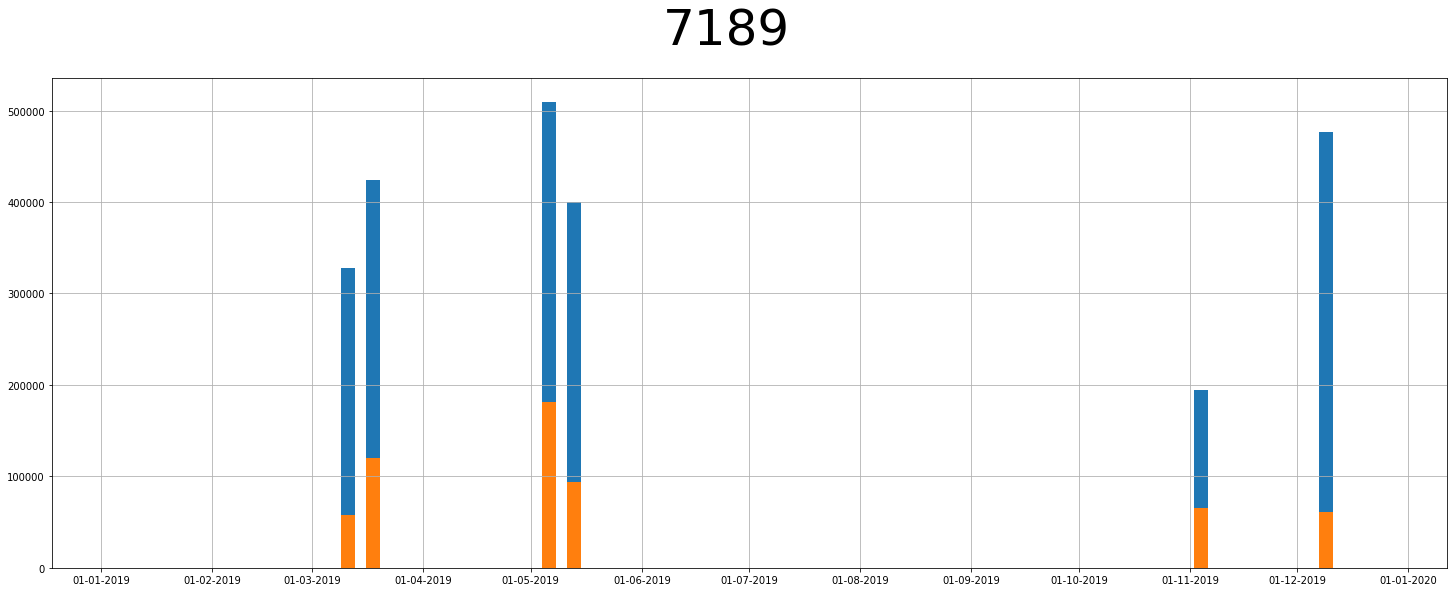

In [715]:
fig, ax = plt.subplots(figsize=(25, 10))

fig.suptitle('7189', fontsize=50)
plt.grid()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gcf().autofmt_xdate()
plt.bar(total_final[total_final['skutertiaryid']==7189]['sale_dt'], total_final[total_final['skutertiaryid']==7189]['promo_cost'], width=4)
plt.bar(total_final[total_final['skutertiaryid']==7189]['sale_dt'], total_final[total_final['skutertiaryid']==7189]['sales_groth']*2, width=4)